# Условие лабораторной работы
Обучить нейронную сеть, которой на вход приходят два числа - координаты точки. На выходе должна быть вероятность того, что эта точка лежит выше прямой y = -x
1. Задать нейронную сеть из трёх нейронов
2. Задать сигмоиду как активационную функцию только к последнему нейрону. В первом слое активационная функция a(x) = x
3. Построить (на бумажке от руки) градиент для такой нейронной сети
4. Сгенерировать 1000 - 10000 (много) точек для обучающей выборки
5. Обучить на этой выборке сеть, используя выведенную формулу градиента и формулу W_new = W_old - λ*∇. Коэффициент лямбда подобрать
6. Сгенерировать ещё 100 точек для валидирующей выборки, найти, какую долю из этих точек нейросеть определяет правильно

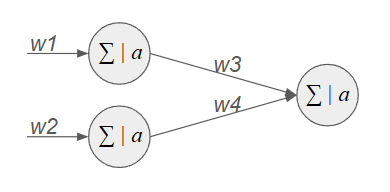

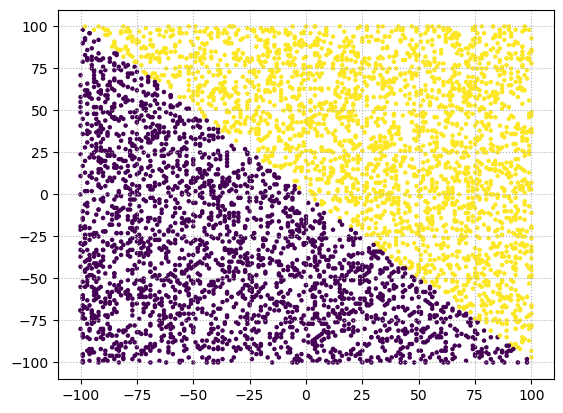

In [29]:
"""Подготовка тренировочных значений"""
import random
import matplotlib.pyplot as plt

NUM_OF_TRAINING = 5000

# Генерация рандомных точек
list_x = []
list_y = []
answers = []
for _ in range(NUM_OF_TRAINING):
    list_x.append(random.randint(-100, 100))
    list_y.append(random.randint(-100, 100))
    answers.append(1 if list_y[-1] > -list_x[-1] else 0)

# График точек
plt.grid(ls=':')
plt.scatter(list_x, list_y, c=answers, s=5)
plt.show()

In [30]:
"""Обучение модели"""
from numpy import exp

NUM_OF_EPOCHS = 10
WEIGHT_CHANGE_COEFF = 0.001 # Коэффициент лямбда из задания


linear_activator = lambda x: x
sigmoid_activator = lambda x: 1 / (1 + exp(-x))

def passing_through_neural_network(x, y, weights):
    """Прохождение через нейронную сеть

    Returns:
        float: От 0 до 1. Вероятность удовлетворения условию поданных значений.
    """
    
    # Вычисление результатов работы нейронов первого слоя
    rslt_one = linear_activator(x * weights[0])
    rslt_two = linear_activator(y * weights[1])
    
    # Вычисление результата выходного слоя
    product_one = weights[2] * rslt_one
    product_two = weights[3]* rslt_two
    
    return sigmoid_activator(product_one + product_two)

def calc_const_part_grad(increased_exp, answer):
    return 2*(1/(1+increased_exp) - answer)*increased_exp / (1+increased_exp)**2
    

# Генерация входных весов
weights = [random.uniform(-1, 1) for _ in range(4)]
print(f"Изначальные веса модели:", *map(lambda i: f"{i:.5f}", weights))

# Тренировка модели с помощью использования градиента (изменение весов)
for _ in range(NUM_OF_EPOCHS):
    for i in range(NUM_OF_TRAINING):
        # Используется метод обратного распространения ошибки (back propagation)
        # Градиент находится разбиением на части, которые можно вычислить единожды
        x, y = list_x[i], list_y[i]
        exp_degree = -weights[2]*weights[0]*x-weights[3]*weights[1]*y
        increased_exp = exp(exp_degree)
        intermediate_result = WEIGHT_CHANGE_COEFF*calc_const_part_grad(increased_exp, answers[i])
        w1, w2, w3, w4 = weights[0], weights[1], weights[2], weights[3] 
        weights[0] -= intermediate_result*w3*x
        weights[1] -= intermediate_result*w4*y
        weights[2] -= intermediate_result*w1*x
        weights[3] -= intermediate_result*w2*y
print(f"Веса обученной модели:", *map(lambda i: f"{i:.5f}", weights))

Изначальные веса модели: 0.62070 0.31040 0.40372 0.56854
Веса обученной модели: 0.75947 0.63586 0.63336 0.76393


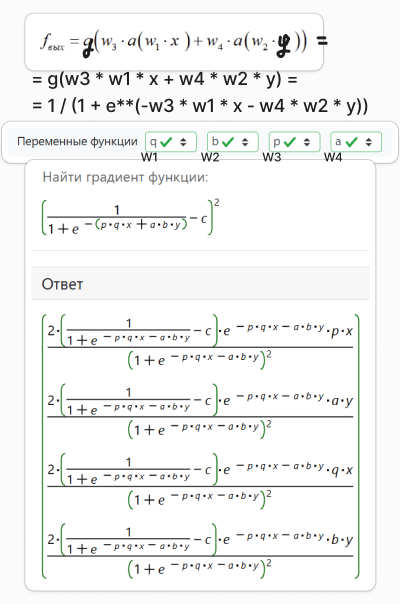

Процент значений определённых правильно: 97.00%


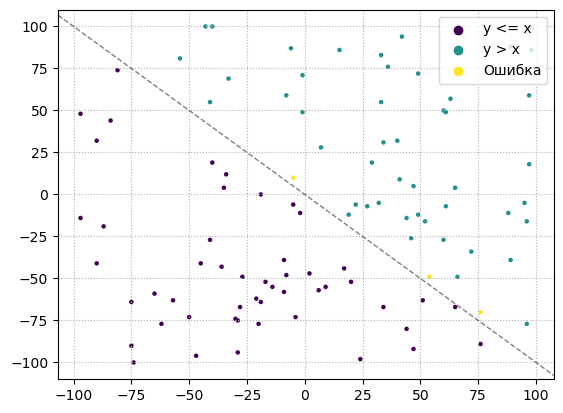

In [47]:
"""Подготовка вылидационных значений и их использование"""
import random
import matplotlib.pyplot as plt
import numpy as np

NUM_OF_VALIDATION = 100
CONFIDENCE_INTERVAL = 0.95

# Генерация и проверка рандомных точек
list_validation_x = []
list_validation_y = []
model_answers = []
correct_answers = []
num_correct = 0
for _ in range(NUM_OF_VALIDATION):
    list_validation_x.append(random.randint(-100, 100))
    list_validation_y.append(random.randint(-100, 100))
    correct_answers.append(list_validation_y[-1] > -list_validation_x[-1])
    model_answers.append(
        round(
            passing_through_neural_network(
                list_validation_x[-1],
                list_validation_y[-1],
                weights
            ),
            4
        ) >= CONFIDENCE_INTERVAL
    )
    if correct_answers[-1] == model_answers[-1]:
        num_correct += 1
    else:
        model_answers[-1] = 2
print(f"Процент значений определённых правильно: {num_correct/NUM_OF_VALIDATION:.2%}")

# График точек
plt.grid(ls=':')
plt.axline((0, 0), slope=-1, color='black', linestyle='--', alpha=0.5, linewidth=1)
scatter = plt.scatter(
    list_validation_x, list_validation_y,
    c=model_answers,
    s=5,
)

# Добавление легенды
groups = ['y <= x', 'y > x', 'Ошибка']
unique_categories = sorted(set(model_answers)) # Уникальные категории
colors = scatter.cmap([i / (len(unique_categories) - 1) for i in unique_categories]) # Цвета для категорий
for category, color in zip(unique_categories, colors): # Создаение меток для каждой категории
    plt.scatter([], [], color=color, label=groups[int(category)]) # Пустой scatter для легенды
plt.legend(loc="upper right")

plt.show()